# Практическая работа к теме «1.6. Библиотеки Python для визуализации данных»

## 1. Импорт библиотек

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib

## 2. Первичный анализ и предобработка данных

In [46]:
# Открываем таблицу и записываем данные в переменную df
df = pd.read_csv('DataEngineer.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


Напишем функцию `primary_analitics()`, при помощи которой изучим дополнительную информацию и структуру датасета.

In [47]:
def primary_analytics(data):
    """
    <Создание функции primary_analytics()>
        Input:
            data - переменная, с записанным в нее датасетом, информацию о котором мы хотим получить.
        Out:
            Выводится на экран работа следующих методов:
            .head() - первые N строк датасета;
            .info() - общая информация о структуре датасета;
            .isna().sum() - сумма пропущенных значений по столбцам;
            .describe() - первичные статистики;
            .duplicated().sum() - сумма полных дубликатов.
    """
    
    class stl:
        P = '\033[35m'   # пурпурный
        B = '\033[34m'   # голубой
        G = '\033[32m'   # зеленый
        Y = '\033[33m'   # желтый
        R = '\033[31m'   # красный
        T = '\033[36m'   # бирюзовый
        END = '\033[0m'  # атрибуты по умолчанию
        BLD = '\033[1m'  # жирный
        UND = '\033[4m'  # нижнее подчеркивание
    
    display(data.head(10))
    print()
    print(stl.BLD + '1. Общая информация о структуре датасета:' + stl.END)
    print(stl.B)
    print(data.info())
    print(stl.END)
    print()
    print(stl.BLD + '2. Проверка на пропущенные значения:' + stl.END)
    print(stl.G)
    print(data.isna().sum())
    print(stl.END)
    print()
    print(stl.BLD + '3. Основные описательные статистики:' + stl.END)
    print(stl.P)
    display(data.describe())
    print(stl.END)
    print()
    print(stl.BLD + '4. Проверка на явные полные дубликаты:' + stl.END)
    print(stl.R)
    print(f'Обнаружено дубликатов: {data.duplicated().sum()}')
    print(stl.END)

In [48]:
# применим функцию к датасету df:
primary_analytics(df)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
5,Operations Engineer,$80K-$150K (Glassdoor est.),"Hi, we're Oscar. We're hiring an Operations En...",3.7,Oscar Health\n3.7,"New York, NY","New York, NY",1001 to 5000 employees,2012,Company - Private,Insurance Agencies & Brokerages,Insurance,$2 to $5 billion (USD),-1,True
6,Senior Data Engineer,$80K-$150K (Glassdoor est.),Senior Data Engineer\n\nMaster’s degree in Inf...,3.0,Affinity Solutions\n3.0,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",True
7,Data Engineer,$80K-$150K (Glassdoor est.),Our client is a leading hedge fund looking to ...,4.2,NJF Global Holdings\n4.2,"New York, NY","London, United Kingdom",51 to 200 employees,2003,Company - Private,Staffing & Outsourcing,Business Services,$10 to $25 million (USD),-1,True
8,Data Research Developer,$80K-$150K (Glassdoor est.),About Us\n\nTeza is a quantitative asset manag...,4.3,Teza Technologies\n4.3,"New York, NY","Chicago, IL",51 to 200 employees,2009,Company - Private,Financial Analytics & Research,Finance,Unknown / Non-Applicable,-1,-1
9,Data Engineer (Python),$80K-$150K (Glassdoor est.),What we're looking for\n\nWe are looking for a...,4.4,Conductor\n4.4,"New York, NY","New York, NY",201 to 500 employees,2010,Company - Private,Internet,Information Technology,$25 to $50 million (USD),"Brightedge Technologies, Moz, seoClarity",True



1. Общая информация о структуре датасета:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          2528 non-null   object 
 1   Salary Estimate    2528 non-null   object 
 2   Job Description    2528 non-null   object 
 3   Rating             2528 non-null   float64
 4   Company Name       2528 non-null   object 
 5   Location           2528 non-null   object 
 6   Headquarters       2528 non-null   object 
 7   Size               2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Type of ownership  2528 non-null   object 
 10  Industry           2528 non-null   object 
 11  Sector             2528 non-null   object 
 12  Revenue            2528 non-null   object 
 13  Competitors        2528 non-null   object 
 14  Easy Apply         2528 non-null   object 
dtypes: float64(1), int64(1), obj

,Rating,Founded
count,2528.000000,2528.000000
mean,3.379549,1534.771756
std,1.519254,830.525022
min,-1.000000,-1.000000
25%,3.300000,1864.000000
50%,3.800000,1990.000000
75%,4.100000,2003.000000
max,5.000000,2020.000000




4. Проверка на явные полные дубликаты:

Обнаружено дубликатов: 12



- В таблице 2528 строк и 15 столбцов. 
- Пропуски в данных отсутствуют. 
- Имеется 12 полных дубликатов данных, которые необходимо удалить из датасета. 
- Также следует для удобства стандартизировать названия столбцов в "змеиный регистр". 
- В столбцах `Company Name` и `Job Description` имеются лишние символы от которых необходимо избавиться.
- В других столбцах также встречаются символы -1, значения 'Unknown'. Обработаем их по мере построения графиков.

In [49]:
# Выведем дубликаты на экран
df[df.duplicated()]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
237,Data Engineer,$95K-$167K (Glassdoor est.),"Click ""Apply for this Job"" below to submit you...",4.4,Direct Agents\n4.4,"Culver City, CA","New York, NY",51 to 200 employees,2003,Company - Private,Advertising & Marketing,Business Services,$25 to $50 million (USD),-1,True
261,Data Engineer,$95K-$167K (Glassdoor est.),The Enterprise Data Intelligence Team of Cedar...,-1.0,Bloomstaff,"Los Angeles, CA",-1,-1,-1,-1,-1,-1,-1,-1,-1
843,Data Warehouse Engineer,$79K-$104K (Glassdoor est.),Current Need:\n\nPosition Title: Data Warehous...,3.4,McKesson\n3.4,"Scottsdale, AZ","Irving, TX",10000+ employees,1833,Company - Public,Health Care Services & Hospitals,Health Care,$10+ billion (USD),"Cardinal Health, AmerisourceBergen, UnitedHeal...",-1
1294,Field Services Support Engineer,$28K-$53K (Glassdoor est.),"Why Cognizant?Our strength is our people, and ...",3.7,Cognizant Technology Solutions\n3.7,"San Antonio, TX","Teaneck, NJ",10000+ employees,1994,Company - Public,-1,-1,$10+ billion (USD),"Tata Consultancy Services, Accenture, Capgemini",-1
2191,Data Systems Engineer/Informaticist,$82K-$130K(Employer est.),Job Posting Title:\n\nData Systems Engineer/In...,3.8,Applied Research Laboratories\n3.8,"Austin, TX","Austin, TX",501 to 1000 employees,-1,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,-1
2358,Big Data Engineer- Hadoop,$60K-$109K (Glassdoor est.),Where good people build rewarding careers.\n\n...,3.4,Allstate\n3.4,"Irving, TX","Northbrook, IL",10000+ employees,1931,Company - Public,Insurance Agencies & Brokerages,Insurance,$10+ billion (USD),"Progressive Insurance, State Farm, Farmers Ins...",-1
2365,Data Engineer - Cognitive Computing,$60K-$109K (Glassdoor est.),"Level-row"">Level\nExperienced\nJob Location\nI...",2.9,Caris Life Sciences\n2.9,"Irving, TX","Irving, TX",201 to 500 employees,-1,Company - Private,Research & Development,Business Services,$50 to $100 million (USD),-1,-1
2366,Big Data Engineer,$60K-$109K (Glassdoor est.),Job Description\n\n•\nMinimum 8 years of exper...,3.7,Tata Consultancy Services (North America)\n3.7,"Irving, TX","New York, NY",10000+ employees,1968,Subsidiary or Business Segment,IT Services,Information Technology,$10+ billion (USD),"Cognizant Technology Solutions, Accenture, IBM",-1
2373,Big Data Engineer,$60K-$109K (Glassdoor est.),Tachyon Technologies is a Digital Transformati...,4.4,Tachyon Technologies LLC\n4.4,"Irving, TX","Irving, TX",201 to 500 employees,2011,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),-1,-1
2374,Machine Learning Engineer,$60K-$109K (Glassdoor est.),"Req ID: 90379\n\nAt NTT DATA Services, we know...",3.4,NTT DATA Services\n3.4,"Irving, TX","Tokyo, Japan",10000+ employees,1967,Company - Public,IT Services,Information Technology,$10+ billion (USD),"Capgemini, Accenture, Deloitte",-1


Откорректируем названия столбцов:

Удалим дубликаты данных:

In [50]:
df = df.drop_duplicates().reset_index(drop=True)

In [51]:
df.duplicated().sum()

0

Дубликаты удалены.

In [52]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
list(df.columns)

['job_title',
 'salary_estimate',
 'job_description',
 'rating',
 'company_name',
 'location',
 'headquarters',
 'size',
 'founded',
 'type_of_ownership',
 'industry',
 'sector',
 'revenue',
 'competitors',
 'easy_apply']

Названия откорректированы.

Очистим названия компаний в столбцах `company_name` и `job_description` от лишних символов:

In [53]:
df['company_name'] = df['company_name'].apply(lambda x: x.split('\n')[0])
df['job_description'] = df['job_description'].apply(lambda x: ' '.join(x.split('\n')))

In [54]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description Sagence is a management ad...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities - Architect, build, and ...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview Job description Position Overview: ...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position This position will suppor...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer Job Details Level Experienced J...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True


## 3. Создание палитры визуализации

В качестве основных цветов для построения графиков возьмем корпоротивные цвета hh.ru  
У hh.ru в свободном доступе находится информация о корпоративной палитре - [кликабельно](https://dev.hh.ru/articles/logos#:~:text=%D0%A6%D0%B2%D0%B5%D1%82%D0%B0%20%D1%84%D0%B8%D1%80%D0%BC%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE%20%D1%81%D1%82%D0%B8%D0%BB%D1%8F%3A%20%D0%BA%D1%80%D0%B0%D1%81%D0%BD%D1%8B%D0%B9%20%D0%B8%20%D0%B1%D0%B5%D0%BB%D1%8B%D0%B9.&text=%D0%9B%D0%BE%D0%B3%D0%BE%D1%82%D0%B8%D0%BF%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D0%B5%D1%82%D1%81%D1%8F%20%D0%B2%20%D0%B4%D0%B2%D1%83%D1%85%20%D1%81%D0%BE%D1%87%D0%B5%D1%82%D0%B0%D0%BD%D0%B8%D1%8F%D1%85,%D1%86%D0%B2%D0%B5%D1%82%D0%BD%D0%B0%D1%8F%20%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D1%8F).

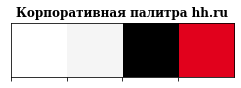

In [55]:
# Четыре основных цвета: белый, серый, черный, красный
sns.palplot(['#ffffff', '#f5f5f5','#000000', '#e1011c'])
plt.title("Корпоративная палитра hh.ru", fontsize=12, fontfamily='serif', loc='center', fontweight='bold')
plt.show()

## 4. График компаний с самым большим кол-вом вакансий

Визуализируем ТОП-10 компаний по количеству вакансий.

In [102]:
company_10_rate = df['company_name'].value_counts()

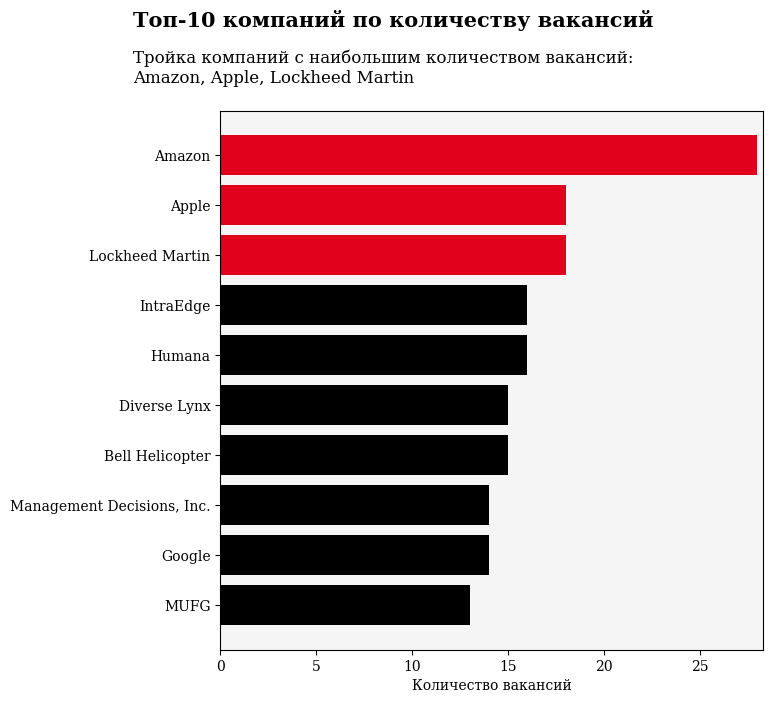

In [128]:
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
colors = ['#e1011c' if i > 16 else '#000000' for i in company_rating[0:10]]
ax.barh(list(company_10_rate.index[0:10]), company_10_rate[0:10], color = colors) 
ax.margins(x=0.01)
ax.invert_yaxis()
ax.set_facecolor('#f5f5f5')
fig.text(0.0, 1, 'Топ-10 компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.0, 0.92, '''Тройка компаний с наибольшим количеством вакансий:
Amazon, Apple, Lockheed Martin''', 
fontsize=12, fontfamily='serif', fontweight='light')
ax.set_xlabel('Количество вакансий', fontfamily='serif', y=1.2)
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.show()

## 5. График самых популярных названий в вакансиях

In [115]:
vacancy_10_rate = df['job_title'].value_counts()

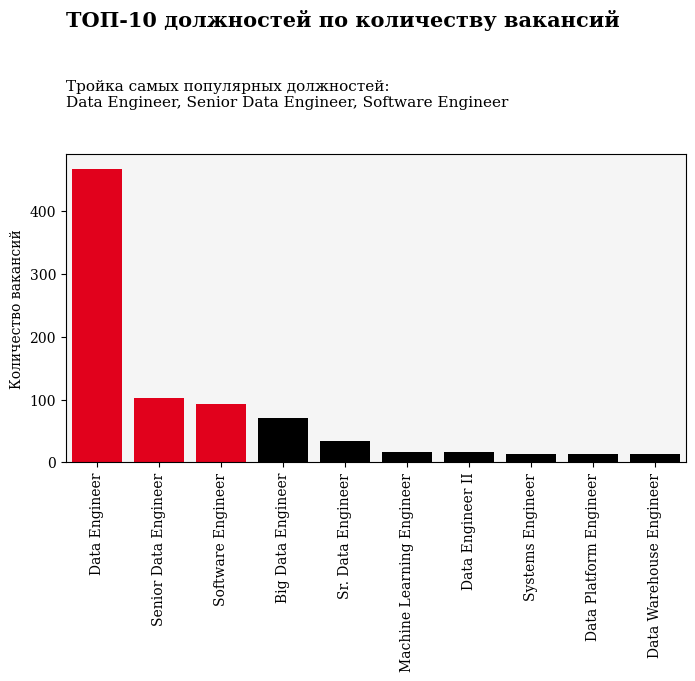

In [129]:
# Строим барплот топ-25 профессий по количеству вакансий
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
colors = ['#e1011c' if i > 80 else '#000000' for i in vacancy_10_rate[0:10]]
ax.bar(vacancy_10_rate.index[0:10], vacancy_20_rate[0:10], color = colors)
ax.margins(x=0.01)
fig.text(0.125, 1.2, 'ТОП-10 должностей по количеству вакансий', 
         fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 1, '''Тройка самых популярных должностей:
Data Engineer, Senior Data Engineer, Software Engineer''', 
fontsize=11, fontfamily='serif', fontweight='light')
ax.set_ylabel('Количество вакансий', fontfamily='serif')
plt.xticks(rotation = 90, fontfamily='serif')
plt.yticks(fontfamily='serif')
ax.set_facecolor('#f5f5f5')
plt.show()

## 6. Круговая диаграмма самых популярных местоположений компаний по численности вакансий

Заменим значения столбца `headquarters` равные -1 на значения "undefinite":

In [130]:
df.loc[df['headquarters']=='-1','headquarters'] = 'undefinite'

In [142]:
headquarters_pie_rate = df['headquarters'].value_counts()
headquarters_pie_rate = headquarters_pie_rate[headquarters_pie_rate.index!='undefinite']
headquarters_pie_rate

New York, NY                    176
Chicago, IL                     108
San Diego, CA                   103
Houston, TX                      64
Austin, TX                       61
                               ... 
South Amboy, NJ                   1
Albuquerque, NM                   1
Long Marston, United Kingdom      1
Deerfield, IL                     1
Cincinnati, OH                    1
Name: headquarters, Length: 435, dtype: int64

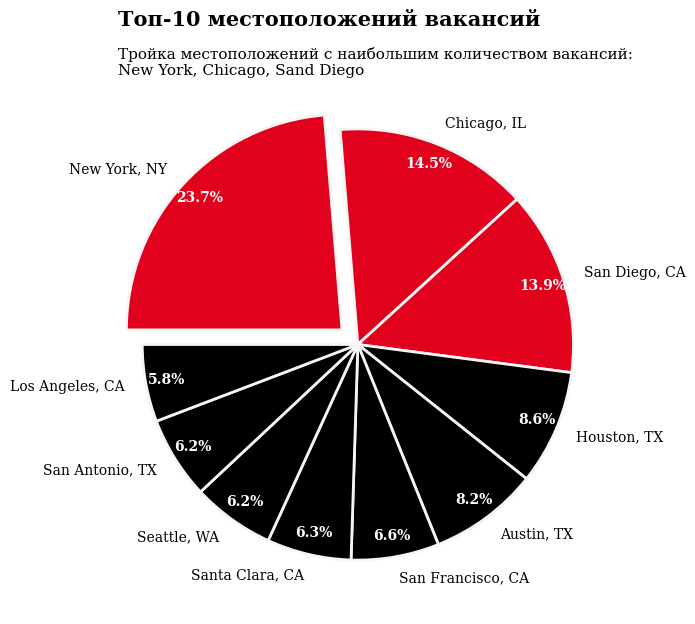

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
colors = ['#e1011c' if i > 64 else '#000000' for i in headquarters_pie_rate[0:10]]

patches, texts, autotexts  = ax.pie(headquarters_pie_rate[0:10],
                                    explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0),
                                    counterclock=False,
                                    labels = headquarters_pie_rate.index[0:10],
                                    colors=colors, 
                                    startangle=180,
                                    wedgeprops = { 'linewidth': 2, 'edgecolor': '#f5f5f5' },
                                    textprops={'fontsize': 10, 'fontfamily':'serif'},
                                    autopct='%1.1f%%', 
                                    pctdistance=0.9)

fig.text(0.170, 0.95, 'Топ-10 местоположений вакансий', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.170, 0.88, '''Тройка местоположений с наибольшим количеством вакансий:
New York, Chicago, Sand Diego''', 
fontsize=11, fontweight='light', fontfamily='serif')
plt.setp(autotexts, color='#ffffff', fontweight='bold')
plt.show()

## 7. График популярности по колонке `type_of_ownership`, относительно численности вакансий

Значения -1 и Unknown в столбце `type_of_ownership` меняем на `undefinite`:

In [155]:
df['type_of_ownership'] = df['type_of_ownership'].replace('Unknown', 'undefinite')
df['type_of_ownership'] = df['type_of_ownership'].replace('-1', 'undefinite')

In [156]:
type_of_ownership_rate = df['type_of_ownership'].value_counts()
type_of_ownership_rate = type_of_ownership_rate[type_of_ownership_rate.index!='undefinite']
type_of_ownership_rate

Company - Private                 1387
Company - Public                   750
Subsidiary or Business Segment     125
Nonprofit Organization              48
Government                          21
College / University                12
Contract                            10
Private Practice / Firm              6
Other Organization                   4
Hospital                             3
Self-employed                        1
School / School District             1
Name: type_of_ownership, dtype: int64

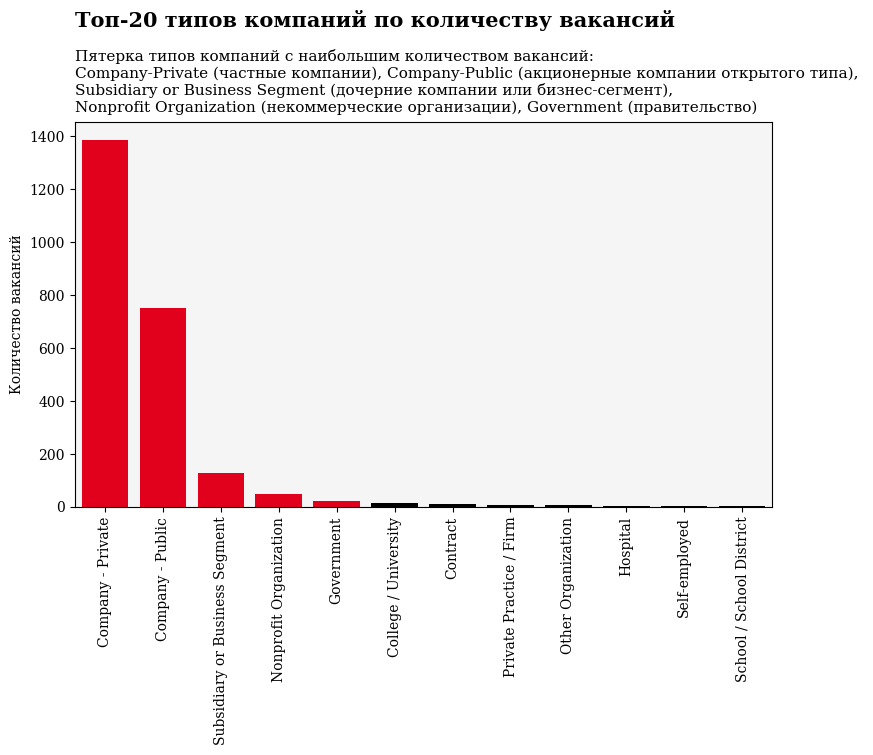

In [161]:
# Строим барплот топ-10 типов компаний по количеству вакансий
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
colors = ['#e1011c' if i > 20 else '#000000' for i in type_of_ownership_rate[0:20]]
ax.bar(type_of_ownership_rate.index[0:20], type_of_ownership_rate[0:20], color = colors)
fig.text(0.125, 1.07, 'Топ-20 типов компаний по количеству вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.125, 0.9, '''Пятерка типов компаний с наибольшим количеством вакансий:
Company-Private (частные компании), Company-Public (акционерные компании открытого типа), 
Subsidiary or Business Segment (дочерние компании или бизнес-сегмент),
Nonprofit Organization (некоммерческие организации), Government (правительство)''', 
fontsize=11, fontweight='light', fontfamily='serif')
ax.margins(x=0.01)
ax.set_ylabel('Количество вакансий', fontfamily='serif')
plt.xticks(rotation = 90, fontfamily='serif')
ax.set_facecolor('#f5f5f5')
plt.yticks(fontfamily='serif')
plt.show()

## 8. График популярности по секторам работы

Значения '-1' в столбце `sector` меняем на `undefinite`:

In [169]:
df['sector'] = df['sector'].replace('-1', 'undefinite')

In [171]:
sector_rate = df['sector'].value_counts()
sector_rate = sector_rate[sector_rate.index!='undefinite']
sector_rate.head(25)

Information Technology                885
Business Services                     414
Finance                               177
Aerospace & Defense                    94
Manufacturing                          93
Insurance                              81
Media                                  52
Health Care                            50
Oil, Gas, Energy & Utilities           37
Retail                                 36
Biotech & Pharmaceuticals              35
Telecommunications                     32
Education                              27
Accounting & Legal                     27
Government                             24
Transportation & Logistics             24
Real Estate                            16
Consumer Services                      13
Restaurants, Bars & Food Services       7
Construction, Repair & Maintenance      7
Arts, Entertainment & Recreation        5
Travel & Tourism                        4
Non-Profit                              2
Agriculture & Forestry            

Отобразим ТОП-25 видов секторов компаний по количеству вакансий

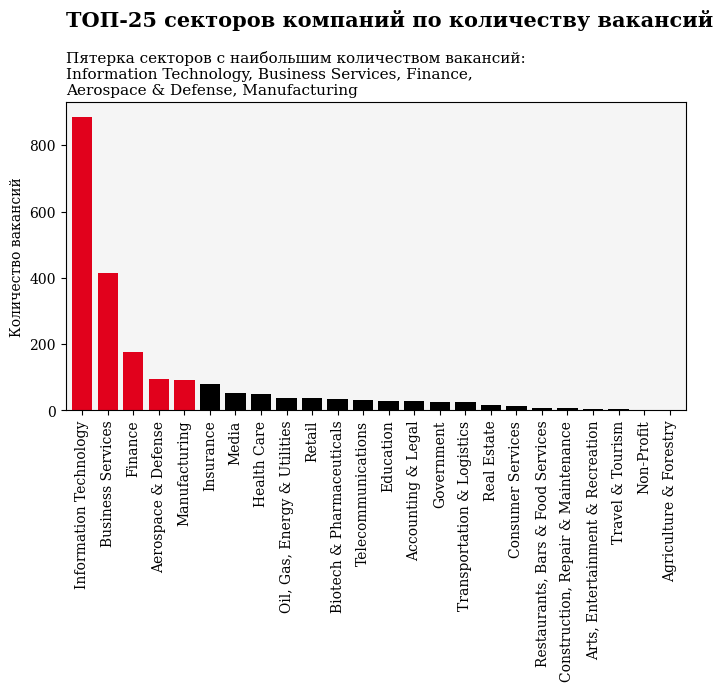

In [176]:
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
colors = ['#e1011c' if i > 90 else '#000000' for i in sector_rate[0:25]]

ax.bar(list(sector_rate.index[0:25]), sector_rate[0:25], color = colors)
ax.set_facecolor('#f5f5f5')
ax.margins(x=0.01)
ax.set_ylabel('Количество вакансий', fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.xticks(rotation = 90, fontfamily='serif')
fig.text(0.125, 1.07, 'ТОП-25 секторов компаний по количеству вакансий', fontweight='bold', fontfamily='serif', fontsize=15)
fig.text(0.125, 0.9, '''Пятерка секторов с наибольшим количеством вакансий:
Information Technology, Business Services, Finance, 
Aerospace & Defense, Manufacturing''',
fontweight='light', fontfamily='serif', fontsize=11)
plt.show()

## 9. График рейтингов секторов работы по уровню средних зарплат

В датасете информация о зарплате представляет собой диапазоны значений от минимальной зарплаты до максимальной. 
Введем два дополнительных столбца. В первом укажем минимальное значение зарплаты, а во втором максимальное. На основании этих данных добавим третий столбец со средней зарплатой этого диапазона.

In [184]:
# Добавляем стобцы
df['salary_min'] = np.nan
df['salary_max'] = np.nan
df['salary_mean'] = np.nan

In [216]:
# Функция одной строки для выделения минимальной, максимальной и средней зарплаты
def min_max_salary(row):
    salary = row['salary_estimate']
    min_max = (salary.replace('(', '#')
               .split('#')[0]
               .replace('$', '')
               .replace('K', '')
               .replace(' ', '')
               .split('-'))
    row['salary_min'] = int(pd.to_numeric(min_max[0]))
    row['salary_max'] = int(pd.to_numeric(min_max[1]))
    row['salary_mean'] = (int(min_max[0]) + int(min_max[1])) / 2
    
    return row
    

In [217]:
# Применяем функцию к датасету
df = df.apply(min_max_salary, axis=1)

In [218]:
df

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,salary_min,salary_max,salary_mean
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description Sagence is a management ad...,4.5,Sagence,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,80,150,115.0
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities - Architect, build, and ...",3.4,Enterprise Integration,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,80,150,115.0
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview Job description Position Overview: ...,5.0,Maestro Technologies,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,80,150,115.0
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position This position will suppor...,4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,80,150,115.0
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer Job Details Level Experienced J...,3.7,GNY Insurance Companies,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,80,150,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,Cloud Engineer,$76K-$128K (Glassdoor est.),The Expertise You Have Proven expertise in dev...,4.5,PMG Global,"Westlake, TX","Herndon, VA",1 to 50 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1,76,128,102.0
2512,Electrical Engineer,$76K-$128K (Glassdoor est.),Lockheed Martin is seeking a Circuit and FPGA ...,2.9,Albin Engineering Services,"Fort Worth, TX","Santa Clara, CA",51 to 200 employees,1993,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,-1,76,128,102.0
2513,Sr. Big Data Engineer,$76K-$128K (Glassdoor est.),Posting Title Principal Data Engineer (Contrac...,3.7,Cincinnati Bell Technology Solutions,"Irving, TX","Cincinnati, OH",501 to 1000 employees,-1,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,76,128,102.0
2514,Senior Big Data / ETL Engineer,$76K-$128K (Glassdoor est.),"Your Opportunity Charles Schwab & Co., Inc is...",3.5,Schwab,"Westlake, TX","Dettenheim, Germany",Unknown,-1,Company - Public,-1,undefinite,Unknown / Non-Applicable,-1,-1,76,128,102.0


In [222]:
# Формируем сводную таблицу секторов по среднему уровню зарплат и сортируем ее по убыванию
sector_pivot = (df.pivot_table(index='sector', values='salary_mean')
                .sort_values(by='salary_mean', ascending=False)
                .reset_index())
sector_pivot

,sector,salary_mean
0,Biotech & Pharmaceuticals,112.314286
1,Media,111.076923
2,Health Care,106.530000
3,Accounting & Legal,106.259259
4,Non-Profit,105.750000
5,Information Technology,104.849153
6,Manufacturing,103.672043
7,Education,102.240741
8,Transportation & Logistics,100.750000
9,"Restaurants, Bars & Food Services",100.571429


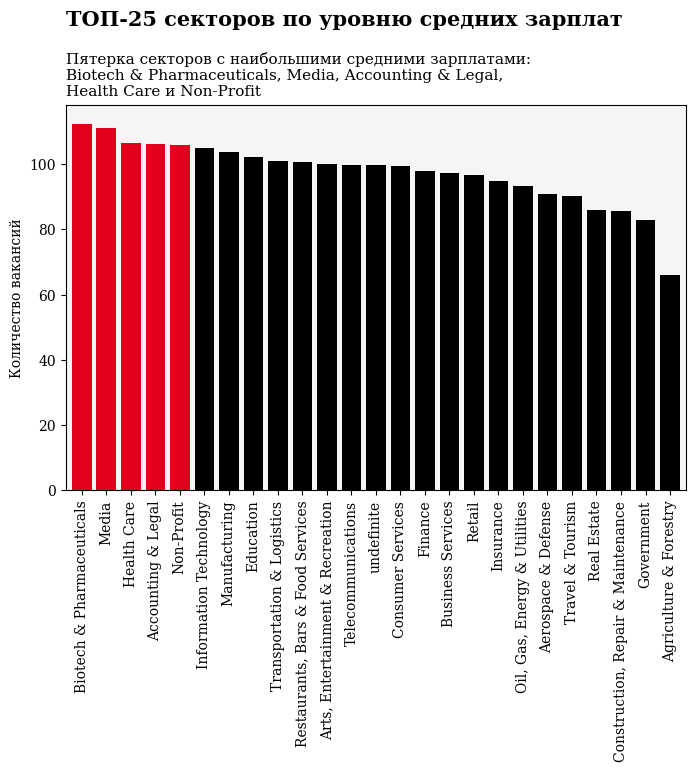

In [226]:
plt.rcdefaults()
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
colors = ['#e1011c' if i < 5 else '#000000' for i in sector_pivot.index]

ax.bar(sector_pivot['sector'], sector_pivot['salary_mean'], color = colors)
ax.set_facecolor('#f5f5f5')
ax.margins(x=0.01)
ax.set_ylabel('Количество вакансий', fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.xticks(rotation = 90, fontfamily='serif')
fig.text(0.125, 1.04, 'ТОП-25 секторов по уровню средних зарплат', fontfamily='serif', fontsize=15, fontweight='bold')
fig.text(0.125, 0.9, '''Пятерка секторов с наибольшими средними зарплатами:
Biotech & Pharmaceuticals, Media, Accounting & Legal, 
Health Care и Non-Profit''',
fontweight='light', fontfamily='serif', fontsize=11)
plt.show()

## 10. Гистограмма распределения рейтинга компаний

Прежде чем строить график заменим значения '-1' в колонке `rating` на медианные значения

In [227]:
rating_median = df[df['rating'] != -1]['rating'].median()
rating_median

3.8

In [235]:
# Заменяем значения
df.loc[df['rating'] == -1, 'rating'] = rating_median

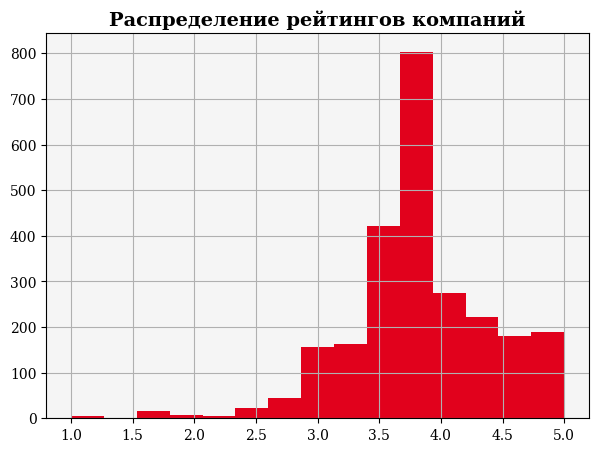

In [238]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
df.rating.hist(bins=15, color = '#e1011c')
ax.set_facecolor('#f5f5f5')
plt.title('Распределение рейтингов компаний', fontfamily='serif', fontsize=14, fontweight='bold')
ax.set_facecolor('#f5f5f5')
plt.xticks(fontfamily='serif')
plt.yticks(fontfamily='serif')
plt.show()

## 11. График средних зарплат по популярным компаниям

In [239]:
# Отфильтруем датасет по значению рейтинга равного >= 4.5
high_rate_companies = df[df['rating'] >= 4.5]

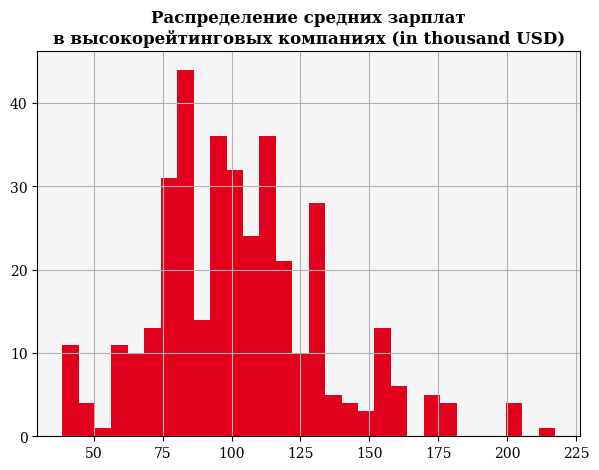

In [241]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.set_facecolor('#f5f5f5')
high_rate_companies['salary_mean'].hist(bins=30, color = '#e1011c')
plt.title('''Распределение средних зарплат
в высокорейтинговых компаниях (in thousands USD)''', 
fontfamily='serif', fontsize=12, fontweight='bold')
plt.yticks(fontfamily='serif')
plt.xticks(fontfamily='serif')
plt.show()

## 12. Облако тэгов по описанию вакансий

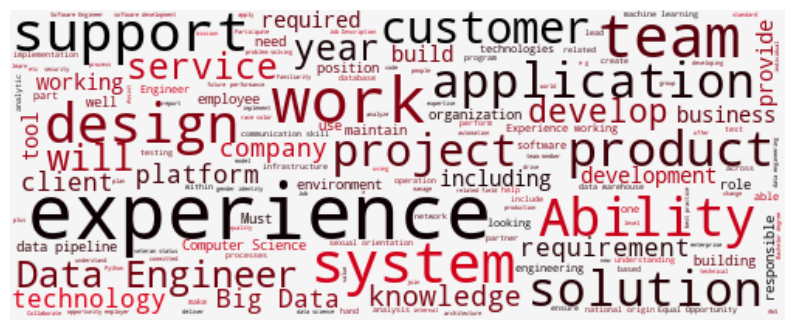

In [246]:
stopwords = set(STOPWORDS)
text = " ".join(txt for txt in df['job_description'])
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#e1011c', '#000000'])
wordcloud = WordCloud(stopwords=stopwords, 
                      max_font_size=50, 
                      max_words=150,
                      width = 500, 
                      height = 200, 
                      colormap=cmap,
                      background_color='#f5f5f5').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Выделим десятку наиболее популярных и часто указываемых слов в описаниях вакансий:**

* experience;
* ability;
* work;
* system;
* support;
* team;
* design;
* customer;
* application;
* product.




# Чек-лист

[x] Построить график компаний с самым большим кол-вом вакансий  
[x] Построить график самых популярных названий в вакансиях  
[x] Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму  
[x] Построить график популярности по колонке Type of ownership, относительно численности вакансий  
[x] Построить график популярности по секторам работы  
[x] Построить график используя сектора работы и средний уровень зарплат в них  
[x] Построить гистограмму распределения рейтинга компаний  
[x] Построить график средних зарплат по популярным компаниям  
[x] Построить по описанию вакансий облако тегов, исследовать самые популярные слова  
[x] В графиках использовать основные цвета сайта hh.ru  

Выполнил Липецкий Николай